In [8]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt


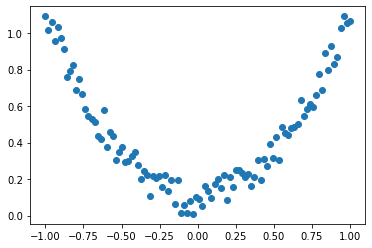

In [9]:
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
#y=x^2 + 噪音
y = x.pow(2) + 0.2*torch.rand(x.size())

x,y = Variable(x),Variable(y)

plt.scatter(x.data.numpy(),y.data.numpy())
plt.show()

In [10]:
class Net(torch.nn.Module):
    def __init__(self,n_features,n_hidden,n_output) -> None:
        super(Net,self).__init__()
        #定义隐藏层。隐藏层中的属性就是参数
        self.hidden = torch.nn.Linear(n_features,n_hidden)
        self.predict = torch.nn.Linear(n_hidden,n_output)

    #x : 输入信息
    def forward(self,x):
        #激励函数激活(嵌套隐藏层输出信息)
        x = F.relu(self.hidden(x))
        #输出层(回归问题一般不需要激励函数，会舍弃了部分负值内容)
        x = self.predict(x)
        return x 



In [12]:
net = Net(1,10,1)
print(net)

plt.ion()
plt.show()

#net.parameters：传入神经网络中的参数；指定learning rate（一般小于1）
optimizer = torch.optim.SGD(net.parameters,lr=0.5)
#处理误差（均方差函数）
loss_func = torch.nn.MSELoss()

for t in range(100):
    #计算预测值
    prediction = net(x)
    #计算误差（先prediction，后真实值）
    loss = loss_func(prediction,y)
    #先梯度清零
    optimizer.zero_grad()
    #计算结点梯度
    loss.backward()
    #优化梯度
    optimizer.step()

    if t % 5 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(),y.data.numpy())
        

TypeError: 'method' object is not iterable